In [59]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
# %matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset
#import cmocean as ocm
%load_ext autoreload
%autoreload 2
import pyfesom as pf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/iceOceanC/1006/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [55]:
meshpath_z = '/work/ollie/orichter/mesh/oce0_z'
mesh_z = pf.fesom_mesh(meshpath_z, abg=[0,0,0],cavity=False) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/data/oce0comdw_z_0.10/RG47911.2023.forcing.diag.nc')
level_data1, elem_no_nan = pf.get_data(np.mean(fl['wnet'][-6:,:],0),mesh_z,0)

fl = Dataset('/work/ollie/orichter/data/oce0comdwK_z_0.10/RG47911.2023.forcing.diag.nc')
level_data2, elem_no_nan = pf.get_data(np.mean(fl['wnet'][-6:,:],0),mesh_z,0)



Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


(-25.40384367966908, 86.496948180865729)


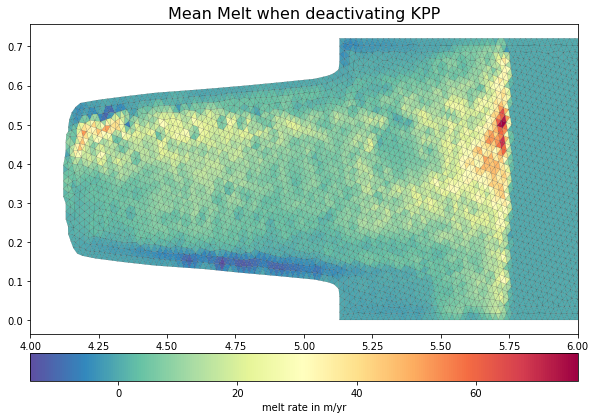

In [58]:
#level_data1, elem_no_nan = pf.get_data(np.mean(fl['wnet'][-6:,:],0),mesh_z,0)
#level_data2, elem_no_nan = pf.get_data(fl['wnet'][-1,:],mesh_z,20)
data = level_data2#-level_data1
plt.figure(figsize=(8.27,6))

data = data*365*24*3600
print(data.min(),data.max())
plt.tripcolor(mesh_z.x2, mesh_z.y2, elem_no_nan, \
              data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r
             )
cbar = plt.colorbar(orientation='horizontal', pad=0.05,cmap='bwr');
cbar.set_label("melt rate in m/yr")
plt.title('Mean Melt when deactivating KPP',size=16)
plt.tight_layout()
plt.xlim(4.0,6.0)
#plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
plt.show()

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds
For depth 20 model level 20.0 will be used
For depth 20 model level 20.0 will be used
For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used
30.2951951304


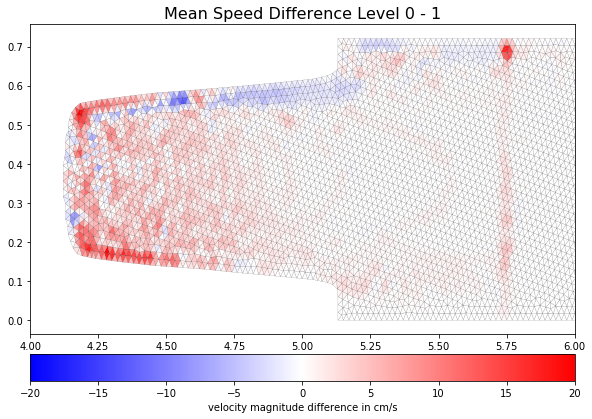

In [31]:
meshpath = '/work/ollie/orichter/mesh/oce0_z'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/data/oce0comdw_z_0.10/RG47911.2025.oce.nc')
v, elem_no_nan = pf.get_data(np.mean(fl['v'][:],0),mesh,20)
u, elem_no_nan = pf.get_data(np.mean(fl['u'][:],0),mesh,20)
data1 = np.sqrt(v**2+u**2)*100
v, elem_no_nan = pf.get_data(np.mean(fl['v'][:],0),mesh,0)
u, elem_no_nan = pf.get_data(np.mean(fl['u'][:],0),mesh,0)
data0 = np.sqrt(v**2+u**2)*100

data = data0-data1
print(data.max())

plt.figure(figsize=(8.27,6))
plt.tripcolor(mesh_z.x2, mesh_z.y2, elem_no_nan, \
              data, \
              edgecolors='k',\
              lw = 0.1,
             cmap='bwr',vmin=-20,vmax=20
             )
cbar = plt.colorbar(orientation='horizontal', pad=0.05,cmap='bwr');
cbar.set_label("velocity magnitude difference in cm/s")
plt.title('Mean Speed Difference Level 0 - 1',size=16)
plt.tight_layout()
plt.xlim(4.0,6.0)
#plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
plt.show()

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds
For depth 600 model level 600.0 will be used


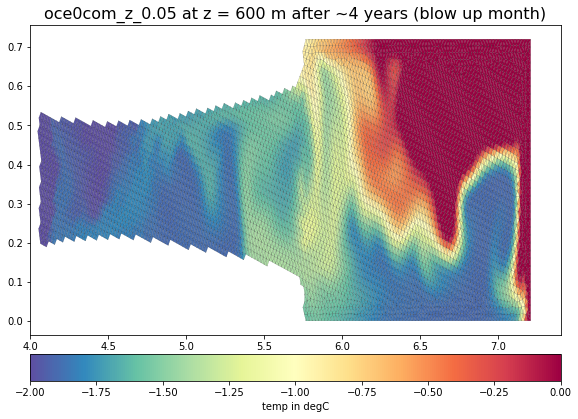

In [7]:
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath_z  = basedir+'fesommesh/iceOceanC/1002'
mesh_z = pf.fesom_mesh(meshpath_z, abg=[0,0,0]) ## for melt rate we need to deactivate cavity
fl = Dataset('/work/ollie/orichter/MisomipPlus/fesomdata/iceOceanC/iceOceanC.1002.oce.nc')

level_data, elem_no_nan = pf.get_data(fl['temp'][-1,:],mesh_z,600)

plt.figure(figsize=(8.27,6))

level_data = level_data
plt.tripcolor(mesh_z.x2, mesh_z.y2, elem_no_nan, \
              level_data, \
              edgecolors='k',\
              lw = 0.1,
             cmap=cm.Spectral_r,
             vmin = -2,
             vmax = 0)
cbar = plt.colorbar(orientation='horizontal', pad=0.05,cmap='viridis');
cbar.set_label("temp in degC")
plt.title('oce0com_z_0.05 at z = 600 m after ~4 years (blow up month)',size=16)
plt.tight_layout()
plt.xlim(4.0,7.4)
#plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/iceOceanG_melt_"+year_out+".png")
plt.show()

In [29]:
#basedir = '/mnt/lustre01/work/ab0995/a270088/DATA/swift.dkrz.de/'
basedir = '/work/ollie/orichter/MisomipPlus/'
meshpath  = basedir+'fesommesh/iceOceanC/1006/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=True)
#meshpath  = basedir+'fesommesh/RG47911/2059/'
#mesh_new = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
#pf.plot_transect_map(lon_star
#fl = Dataset(basedir+'fesomdata/RG47911/RG47911.2058.oce.nc')

Load 2d part of the grid in 0 second(s)
correct for cavity
Load 3d part of the grid in 0 seconds


# checking the fields

In [143]:
#mesh=mesh_new
inds = mesh.ind3d[mesh.n32-1]
bry = (inds==11) | (inds==21) | (inds==31)
inds[bry]=1
inds[~bry]=0

In [30]:
mesh.n32[:,0]

True

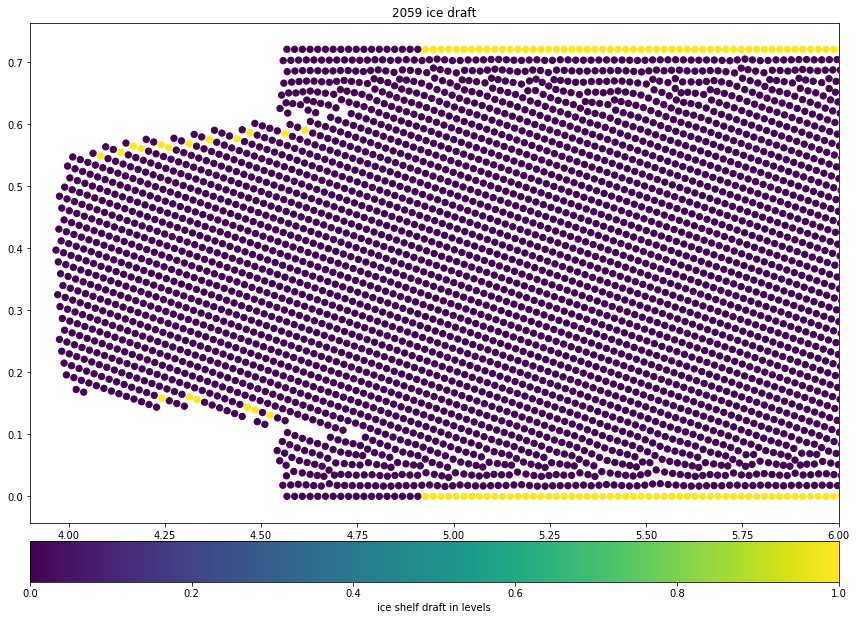

In [150]:
plt.figure(figsize=(12,9))
plt.scatter(mesh.x2,mesh.y2,40,mesh.,cmap='viridis')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('ice shelf draft in levels')
plt.title("2059 ice draft")
plt.tight_layout()

In [85]:
mesh=mesh_new
draft=np.zeros_like(mesh.topo)
for i,row in enumerate(mesh.n32):
    mesh.topo[i] = np.where(row>0)[0][-1]*20
    draft[i] = np.where(row>0)[0][0]*20

In [33]:
draft

NameError: name 'draft' is not defined

NameError: name 'draft' is not defined

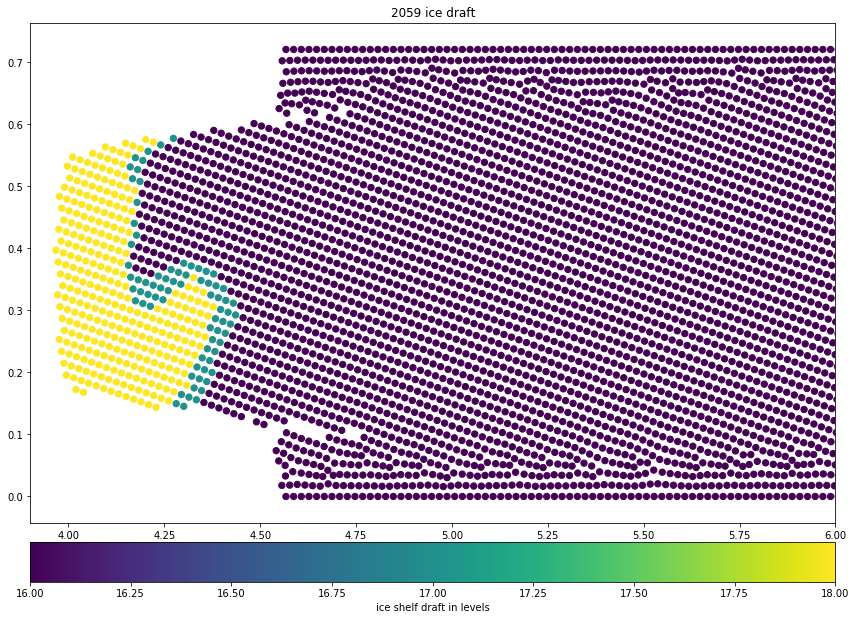

In [113]:
plt.figure(figsize=(12,9))
plt.scatter(mesh.x2,mesh.y2,40,draft/20,cmap='viridis',vmin=16,vmax=18)
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('ice shelf draft in levels')
plt.title("2059 ice draft")
plt.tight_layout()

(73, 324)

In [40]:
min(np.sum(mesh.n32>0,1))

3

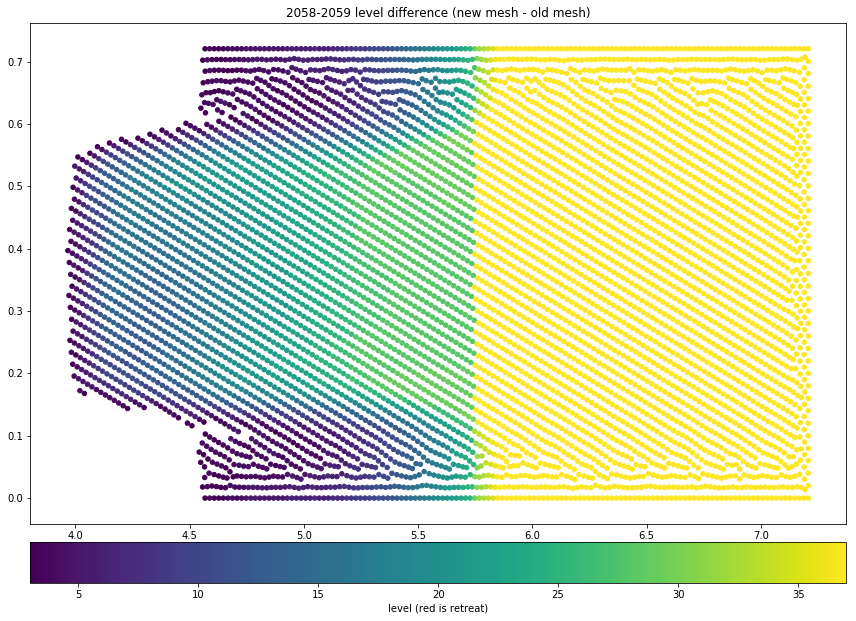

In [22]:
plt.figure(figsize=(12,9))
plt.scatter(mesh.x2,mesh.y2,20,np.sum(mesh.n32>0,1),cmap='viridis')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
#plt.xlim(3.9,6.0)
cbar.set_label('level (red is retreat)')
plt.title("2058-2059 level difference (new mesh - old mesh)")
plt.tight_layout()

# lev_diff retreat vs uplift

In [152]:
from scipy import interpolate
f = interpolate.NearestNDInterpolator(list(zip(mesh_old.x2,mesh_old.y2)),np.arange(mesh_old.n2d))
idxOld2New = f(mesh_new.x2,mesh_new.y2)
lev_diff = np.sum(mesh_new.n32>0,1) - np.sum(mesh_old.n32[idxOld2New]>0,1)

In [49]:
np.sum(mesh_new.n32>0,1).shape

(6404,)

In [6]:
ones = np.zeros_like(mesh_new.x2)
ones[np.sum(mesh_new.n32>0,1)==1]=1.0

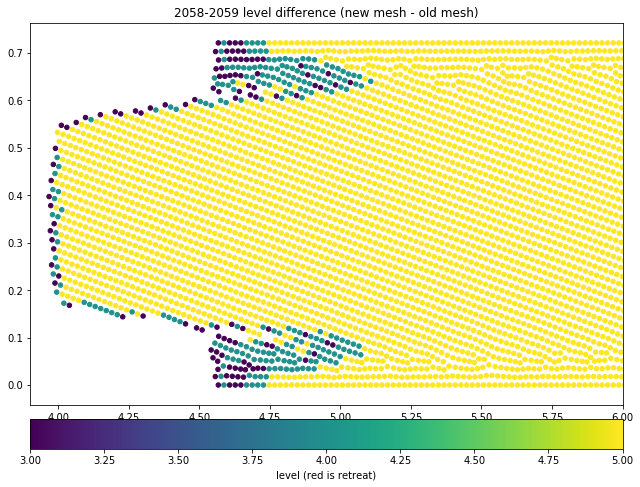

In [7]:
mesh=mesh_new
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,np.sum(mesh_new.n32>0,1),cmap='viridis',vmax=5)
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('level (red is retreat)')
plt.title("2058-2059 level difference (new mesh - old mesh)")
plt.tight_layout()

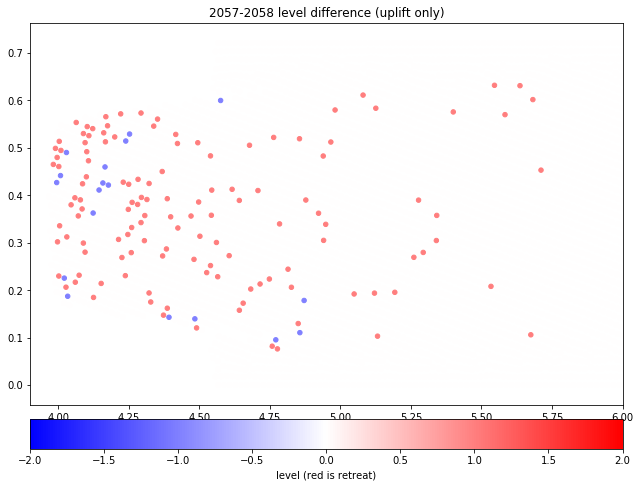

In [153]:
mesh=mesh_new
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,lev_diff,vmin=-2,vmax=2,cmap='bwr')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('level (red is retreat)')
plt.title("2057-2058 level difference (uplift only)")
plt.tight_layout()

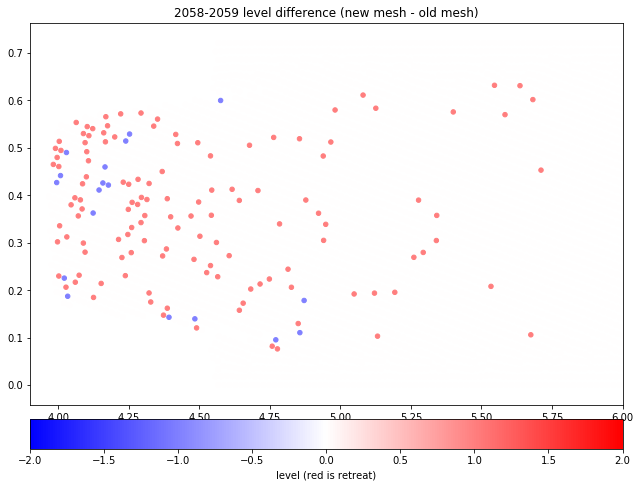

In [16]:
mesh=mesh_new
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,lev_diff,vmin=-2,vmax=2,cmap='bwr')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('level (red is retreat)')
plt.title("2058-2059 level difference (new mesh - old mesh)")
plt.tight_layout()

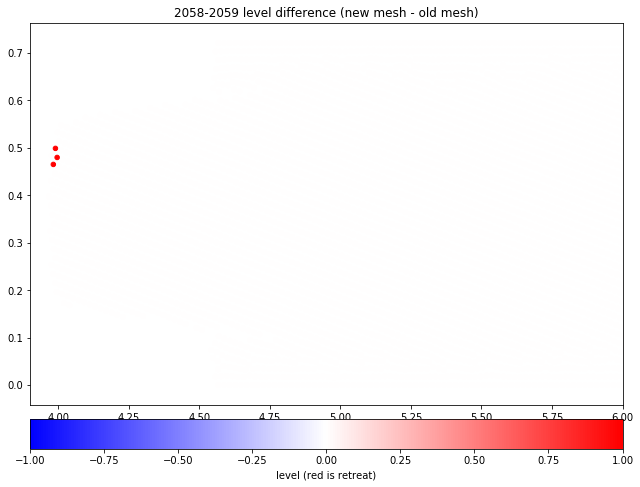

In [9]:
mesh=mesh_new
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,lev_diff,vmin=-1,vmax=1,cmap='bwr')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('level (red is retreat)')
plt.title("2058-2059 level difference (new mesh - old mesh)")
plt.tight_layout()

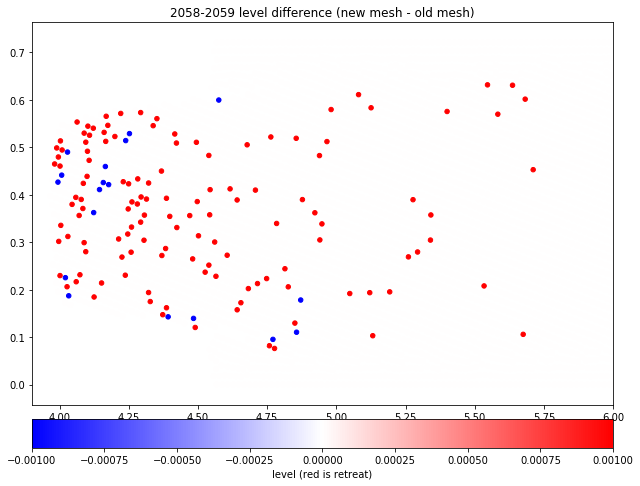

In [43]:
mesh=mesh_new
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,lev_diff,vmin=-0.001,vmax=0.001,cmap='bwr')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label('level (red is retreat)')
plt.title("2058-2059 level difference (new mesh - old mesh)")
plt.tight_layout()

In [7]:
from scipy import interpolate

def plot_levdiff_series(years):
    for year in years: 
        oldMesh = pf.fesom_mesh(basedir+'fesommesh/RG47911/'+str(year-1)+'/', abg=[0,0,0],cavity=False)
        newMesh = pf.fesom_mesh(basedir+'fesommesh/RG47911/'+str(year)+'/', abg=[0,0,0],cavity=False)
    
        f = interpolate.NearestNDInterpolator(list(zip(oldMesh.x2,oldMesh.y2)),np.arange(oldMesh.n2d))
        idxOld2New = f(newMesh.x2,newMesh.y2)
        levDiff = np.sum(newMesh.n32>0,1) - np.sum(oldMesh.n32[idxOld2New]>0,1)
        
        plt.figure(figsize=(9,7))
        plt.scatter(newMesh.x2,newMesh.y2,20,levDiff,vmin=-6,vmax=6,cmap='bwr')
        cbar = plt.colorbar(orientation='horizontal', pad=0.03);
        plt.xlim(3.9,6.0)
        cbar.set_label('level (red is retreat)')
        plt.title("level difference from "+str(year-1)+" to "+str(year))
        plt.savefig("/work/ollie/orichter/MisomipPlus/reports/figures/levDiff_"+str(year-1)+"_"+str(year)+".png")
        plt.close()

In [9]:
%%capture
plot_levdiff_series(np.arange(2022,2060))

In [28]:
meshpath  = basedir+'fesommesh/RG47911/2059/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],cavity=False)
fl = Dataset(basedir+'fesomdata/RG47911/RG47911.2058.oce.nc')
flNc = Dataset(basedir+'fesomdata/RG47911/RG47911.2058.oce.nc_test')
h = np.sum(mesh_new.n32>0,1)*20
uDiff = fl['u'][0]-flNc['u'][0]

Load 2d part of the grid in 0 second(s)
Load 3d part of the grid in 0 seconds


In [29]:
transDiff = np.zeros_like(mesh.x2)
veloDiff = np.zeros_like(mesh.x2)
for i,wc in enumerate(mesh.n32):
    transDiff[i] = np.mean(uDiff[wc-1])*h[i]
    veloDiff[i] = np.mean(uDiff[wc-1])

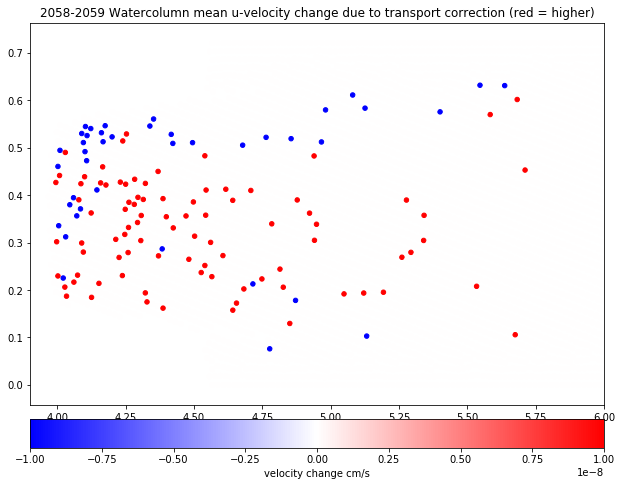

In [37]:
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,veloDiff[:mesh.n2d]*100,vmin=-0.00000001,vmax=0.00000001,cmap='bwr')
cbar = plt.colorbar(orientation='horizontal',pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label("velocity change cm/s")
plt.title('2058-2059 Watercolumn mean u-velocity change due to transport correction (red = higher)')
plt.tight_layout()

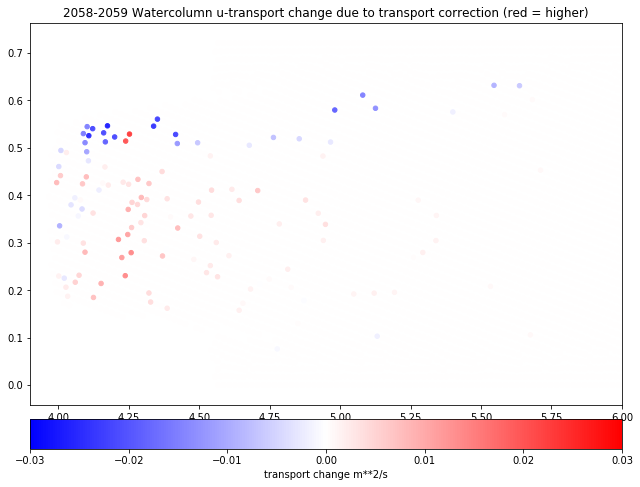

In [32]:
plt.figure(figsize=(9,7))
plt.scatter(mesh.x2,mesh.y2,20,transDiff[:mesh.n2d],vmin=-0.03,vmax=0.03,cmap='bwr')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
plt.xlim(3.9,6.0)
cbar.set_label("transport change m**2/s")
plt.title('2058-2059 Watercolumn u-transport change due to transport correction (red = higher)')
plt.tight_layout()

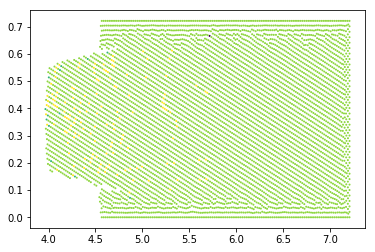

In [94]:
plt.scatter(mesh.x2,mesh.y2,1,level_data)

In [27]:
flNc['u'].values

AttributeError: NetCDF: Attribute not found

In [4]:
basedir = '/work/ollie/orichter/'
meshpath  = basedir+'mesh/oce0_sigma_grid/'
mesh = pf.fesom_mesh(meshpath, abg=[0,0,0],get3d=False)
lon_start = min(mesh.x2)
lat_start = np.mean(mesh.y2)
lon_end   = max(mesh.x2)
lat_end   = np.mean(mesh.y2)

Load 2d part of the grid in 0 second(s)


In [21]:
import pandas as pd
def read_2d(path):
    return pd.read_csv(path, delim_whitespace=True,names=['']).values.flatten()


In [26]:
depth_file = meshpath+'depth.out' 
shelf_file = meshpath+'shelf.out'
depths = read_2d(depth_file)
shelf = read_2d(shelf_file)

array([-105.3355, -179.4129, -178.6873, ..., -106.8793, -147.7359,
       -117.6336])

In [28]:
plt.tripcolor?

In [27]:
#mesh = pf.fesom_mesh(meshpath, abg=[0,0,0])
depth = 100
plt.figure(figsize=(15,7))
level_data, elem_no_nan = pf.get_data(depths,mesh,depth)
plt.tripcolor(mesh.x2, mesh.y2, elem_no_nan[::], level_data, cmap=cm.Spectral_r, extend='neither')
cb = plt.colorbar(orientation='horizontal', pad=0.13);
cb.set_label("Node index")
#loc = np.array(levels) + .5
#cb.set_ticks([5,10.5,15,20.5,25,30.5])
#cb.set_ticklabels(levels[1:])
plt.title('ISOMIP bounday index at depth = '+str(depth))
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'int'